In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [16]:
dru = pd.read_csv('newDrug.csv.gz')
dru.info()
dru.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            215063 non-null  int64  
 1   ID                    215063 non-null  int64  
 2   review                215063 non-null  object 
 3   cleanReview           215063 non-null  object 
 4   rating                215063 non-null  float64
 5   ratingSentiment       215063 non-null  int64  
 6   ratingSentimentLabel  215063 non-null  object 
 7   ReviewScore           215063 non-null  float64
 8   vaderSentiment        215063 non-null  int64  
 9   vaderSentimentLabel   215063 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 16.4+ MB


,Unnamed: 0,ID,review,cleanReview,rating,ratingSentiment,ratingSentimentLabel,ReviewScore,vaderSentiment,vaderSentimentLabel
0,0,206461,"""It has no side effect, I take it in combinati...","""It side effect, I take combination Bystolic 5...",9.0,2,positive,0.0000,0,neutral
1,1,95260,"""My son is halfway through his fourth week of ...","""My son halfway fourth week Intuniv. We became...",8.0,2,positive,0.9070,2,positive
2,2,92703,"""I used to take another oral contraceptive, wh...","""I used take another oral contraceptive, 21 pi...",5.0,0,neutral,0.7096,2,positive
3,3,138000,"""This is my first time using any form of birth...","""This first time using form birth control. I&#...",8.0,2,positive,0.7184,2,positive
4,4,35696,"""Suboxone has completely turned my life around...","""Suboxone completely turned life around. I fee...",9.0,2,positive,0.9403,2,positive


In [17]:
dru = dru.drop(columns=dru.columns[0])
dru.head()

,ID,review,cleanReview,rating,ratingSentiment,ratingSentimentLabel,ReviewScore,vaderSentiment,vaderSentimentLabel
0,206461,"""It has no side effect, I take it in combinati...","""It side effect, I take combination Bystolic 5...",9.0,2,positive,0.0000,0,neutral
1,95260,"""My son is halfway through his fourth week of ...","""My son halfway fourth week Intuniv. We became...",8.0,2,positive,0.9070,2,positive
2,92703,"""I used to take another oral contraceptive, wh...","""I used take another oral contraceptive, 21 pi...",5.0,0,neutral,0.7096,2,positive
3,138000,"""This is my first time using any form of birth...","""This first time using form birth control. I&#...",8.0,2,positive,0.7184,2,positive
4,35696,"""Suboxone has completely turned my life around...","""Suboxone completely turned life around. I fee...",9.0,2,positive,0.9403,2,positive


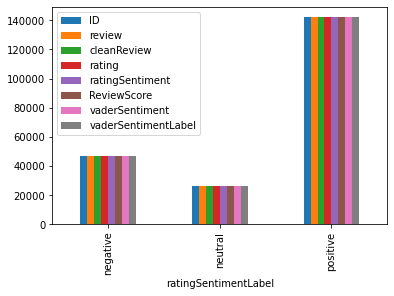

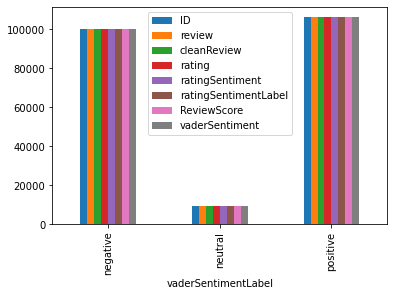

In [18]:
dru.groupby('ratingSentimentLabel').count().plot.bar()
plt.show()
dru.groupby('vaderSentimentLabel').count().plot.bar()
plt.show()

In [19]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
features = tfidf.fit_transform(dru.cleanReview)
labels   = dru.vaderSentiment
features.shape

(215063, 1619394)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(dru['cleanReview'],dru['ratingSentimentLabel'],random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

Logistic=LogisticRegression(random_state=0,solver='lbfgs',max_iter=1500,multi_class='auto')
model = [Logistic]
CV = 5
cv_dru = pd.DataFrame(index=range(CV * len(model)))
entries = []
for model in model:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
  for fold_idx,accuracy in enumerate(accuracies):
    entries.append((model_name,fold_idx,accuracy))
cv_dru = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

cv_dru